In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "/Users/mervesenturk/Documents/UNIVERSITY DOCUMENTS/third year/neuro science project/allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table() #Returns a Pandas dataframe
sessions.head() #Sneak peek of the table

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [4]:
sessions.columns

Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')

In [5]:
# Define filters
MIN_UNIT_COUNT = 500  # Minimum number of neurons recorded
PREFERRED_GENOTYPE = "wt/wt"  # Set to None if you want to include all genotypes

# Apply filtering
filtered_sessions = sessions[
    (sessions["unit_count"] >= MIN_UNIT_COUNT) &  # Select sessions with enough neurons
    (sessions["session_type"] == "brain_observatory_1.1")  # Ensure correct experiment type
]

# If genotype is a factor, filter further
if PREFERRED_GENOTYPE:
    filtered_sessions = filtered_sessions[filtered_sessions["full_genotype"] == PREFERRED_GENOTYPE]

# Sort sessions by unit count (descending order)
filtered_sessions = filtered_sessions.sort_values(by="unit_count", ascending=False)

# Display filtered sessions
print(f"Filtered {len(filtered_sessions)} sessions matching criteria")
print(filtered_sessions[["unit_count", "full_genotype", "ecephys_structure_acronyms"]])

Filtered 15 sessions matching criteria
           unit_count full_genotype  \
id                                    
757216464         959         wt/wt   
750332458         902         wt/wt   
742951821         893         wt/wt   
754829445         832         wt/wt   
732592105         824         wt/wt   
757970808         773         wt/wt   
750749662         761         wt/wt   
761418226         712         wt/wt   
744228101         659         wt/wt   
763673393         629         wt/wt   
739448407         625         wt/wt   
799864342         604         wt/wt   
737581020         568         wt/wt   
743475441         553         wt/wt   
754312389         502         wt/wt   

                                  ecephys_structure_acronyms  
id                                                            
757216464  [LP, DG, CA3, CA1, VISrl, nan, PO, LGd, HPF, V...  
750332458  [grey, VISrl, nan, VISal, IntG, IGL, LGd, CA3,...  
742951821  [VISal, nan, grey, VISl, VISrl, VI

In [6]:
# Find session 757216464 in the session table
session_id = 757216464

# Retrieve session properties
session_metadata = sessions.loc[session_id]

# Display session properties
print(session_metadata)

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           733457989
session_type                                              brain_observatory_1.1
age_in_days                                                               105.0
sex                                                                           M
full_genotype                                                             wt/wt
unit_count                                                                  959
channel_count                                                              2225
probe_count                                                                   6
ecephys_structure_acronyms    [LP, DG, CA3, CA1, VISrl, nan, PO, LGd, HPF, V...
Name: 757216464, dtype: object


In [7]:
# Extract key details
print(f"Session ID: {session_id}")
print(f"Number of Recorded Neurons: {session_metadata['unit_count']}")
print(f"Genotype: {session_metadata['full_genotype']}")
print(f"Brain Regions: {session_metadata['ecephys_structure_acronyms']}")
print(f"Session Type: {session_metadata['session_type']}")
print(f"Mouse Age (Days): {session_metadata['age_in_days']}")
print(f"Sex: {session_metadata['sex']}")

Session ID: 757216464
Number of Recorded Neurons: 959
Genotype: wt/wt
Brain Regions: ['LP' 'DG' 'CA3' 'CA1' 'VISrl' nan 'PO' 'LGd' 'HPF' 'VISal' 'TH' 'LGv'
 'VISl' 'MGm' 'SGN' 'ProS' 'SUB' 'VISp' 'Eth' 'APN' 'VIS' 'MRN' 'MB' 'NOT'
 'VISam']
Session Type: brain_observatory_1.1
Mouse Age (Days): 105.0
Sex: M


In [8]:
# Select the session ID
session_id = 757216464

# Download the session data
session_data = cache.get_session_data(session_id)

# Confirm it was downloaded
print(f"Session {session_id} successfully loaded!")


/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session 757216464 successfully loaded!


In [9]:
session_data.units

/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespa

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951812724,0.530584,165.705150,0.064669,0,237.67,6.884674,9.194248,0.016578,99.937016,0.000019,...,128.0,MRN,8292.0,3663.0,6645.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812745,0.442866,190.595730,0.000315,2,261.61,5.568195,8.493725,0.095506,65.697146,0.002596,...,128.0,MRN,8285.0,3638.0,6650.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812785,0.361222,134.263155,0.000120,6,206.92,5.579259,24.437194,0.000587,86.525032,0.008332,...,128.0,MRN,8274.0,3604.0,6655.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812765,0.760445,124.347795,0.002866,4,331.84,5.722753,2.015055,0.019174,65.450579,0.000766,...,128.0,MRN,8277.0,3612.0,6654.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812811,0.563871,89.634870,0.002207,9,169.08,5.157968,37.454772,0.005522,507.037686,0.005300,...,128.0,MRN,8259.0,3552.0,6663.0,probeA,See electrode locations,29999.957750,1249.998240,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951804296,0.210923,306.674160,0.001616,197,41.65,5.697925,0.687647,0.000000,64.966837,0.000495,...,417.0,VISrl,7418.0,1140.0,8734.0,probeF,See electrode locations,30000.029774,1250.001241,True
951804325,0.319148,99.954465,0.000092,202,134.30,4.619626,2.477649,0.006341,80.954185,0.000225,...,417.0,VISrl,7413.0,1123.0,8742.0,probeF,See electrode locations,30000.029774,1250.001241,True
951804346,0.417369,215.272590,0.001321,206,69.69,8.488513,0.376695,0.000000,92.507609,0.000001,...,417.0,VISrl,7408.0,1105.0,8750.0,probeF,See electrode locations,30000.029774,1250.001241,True


In [10]:
units = session_data.units

In [11]:
print(units["ecephys_structure_acronym"].unique())

['MRN' 'MB' 'APN' 'NOT' 'CA1' 'VISam' 'Eth' 'TH' 'DG' 'VIS' 'MGm' 'SGN'
 'LP' 'ProS' 'SUB' 'VISp' 'LGv' 'CA3' 'VISl' 'PO' 'LGd' 'VISal' 'VISrl']


### FILTERING

In [12]:
# Filtering the neurons based on certain thresholds:
good_units = session_data.units[
    (session_data.units["firing_rate"] > 1) & 
    (session_data.units["isi_violations"] < 0.5) &
    (session_data.units["d_prime"] > 2) &
    (session_data.units["amplitude_cutoff"] < 0.1) &
    (session_data.units["isolation_distance"] > 20)
]

# These are the unit_ids we'll use from now on
good_unit_ids = good_units.index.values

In [13]:
good_units["ecephys_structure_acronym"].value_counts()

LP       111
CA1      103
PO        78
VISp      70
VISam     59
VIS       47
APN       45
VISal     45
VISl      44
Eth       42
SUB       40
DG        39
SGN       38
VISrl     31
TH        17
MGm       13
LGv       11
CA3       11
ProS       6
NOT        5
MRN        5
MB         3
LGd        2
Name: ecephys_structure_acronym, dtype: int64

In [14]:
good_units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951812724,0.530584,165.705150,0.064669,0,237.67,6.884674,9.194248,0.016578,99.937016,0.000019,...,128.0,MRN,8292.0,3663.0,6645.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812745,0.442866,190.595730,0.000315,2,261.61,5.568195,8.493725,0.095506,65.697146,0.002596,...,128.0,MRN,8285.0,3638.0,6650.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812785,0.361222,134.263155,0.000120,6,206.92,5.579259,24.437194,0.000587,86.525032,0.008332,...,128.0,MRN,8274.0,3604.0,6655.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812765,0.760445,124.347795,0.002866,4,331.84,5.722753,2.015055,0.019174,65.450579,0.000766,...,128.0,MRN,8277.0,3612.0,6654.0,probeA,See electrode locations,29999.957750,1249.998240,True
951812811,0.563871,89.634870,0.002207,9,169.08,5.157968,37.454772,0.005522,507.037686,0.005300,...,128.0,MRN,8259.0,3552.0,6663.0,probeA,See electrode locations,29999.957750,1249.998240,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951804292,0.183440,68.397225,0.005699,196,160.80,4.733183,5.327526,0.043889,84.669344,0.000760,...,417.0,VISrl,7420.0,1149.0,8730.0,probeF,See electrode locations,30000.029774,1250.001241,True
951804336,0.343018,103.225395,0.000517,204,81.96,4.556873,18.631697,0.007289,75.656720,0.014710,...,417.0,VISrl,7416.0,1131.0,8738.0,probeF,See electrode locations,30000.029774,1250.001241,True
951804303,0.211121,118.510860,0.015922,198,98.71,4.992141,2.669994,0.049145,86.917841,0.000975,...,417.0,VISrl,7418.0,1140.0,8734.0,probeF,See electrode locations,30000.029774,1250.001241,True


In [15]:
# Check available stimulus
stimuli = session_data.stimulus_presentations["stimulus_name"].unique()
print(stimuli)

/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Applications/anaconda3/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


['spontaneous' 'gabors' 'flashes' 'drifting_gratings'
 'natural_movie_three' 'natural_movie_one' 'static_gratings'
 'natural_scenes']


In [16]:
# Filter drifting_gratings / drifting_gratings_contrast trials
drifting = session_data.get_stimulus_table("drifting_gratings")
static = session_data.get_stimulus_table("static_gratings")

In [17]:
drifting.head()

,stimulus_block,start_time,stop_time,contrast,spatial_frequency,stimulus_name,orientation,temporal_frequency,phase,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1586.113585,1588.115245,0.8,0.04,drifting_gratings,90.0,1.0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",2.00166,246
3799,2.0,1589.116095,1591.117775,0.8,0.04,drifting_gratings,0.0,8.0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",2.00168,247
3800,2.0,1592.118605,1594.120275,0.8,0.04,drifting_gratings,90.0,8.0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",2.00167,248
3801,2.0,1595.121125,1597.122785,0.8,0.04,drifting_gratings,135.0,15.0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",2.00166,249
3802,2.0,1598.123625,1600.125295,0.8,0.04,drifting_gratings,315.0,1.0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",2.00167,250


In [18]:
print(len(static))
static.head()

6000


,stimulus_block,start_time,stop_time,contrast,spatial_frequency,stimulus_name,orientation,phase,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5399.300205,5399.550405,0.8,0.32,static_gratings,0.0,0.5,"[250.0, 250.0]",0.250200,4787
49435,8.0,5399.550405,5399.800605,0.8,0.32,static_gratings,0.0,0.0,"[250.0, 250.0]",0.250200,4788
49436,8.0,5399.800605,5400.050805,0.8,0.04,static_gratings,90.0,0.5,"[250.0, 250.0]",0.250200,4789
49437,8.0,5400.050805,5400.301005,0.8,0.16,static_gratings,120.0,0.5,"[250.0, 250.0]",0.250200,4790
49438,8.0,5400.301005,5400.551212,0.8,0.08,static_gratings,90.0,0.25,"[250.0, 250.0]",0.250207,4791


### Preliminary Analysis

### ✅ Step 1: : COMPUTE SPIKE COUNTS


This code returns a matrix where each row represents a trial, each column represents a neuron, and the values are the number of spikes each neuron fired during that trial.  Previous studies in the field (Marshel et. al, 2012) showed that VISam is highly direction-selective and has a high response to low spatial frequency inputs.Compute Spike Counts per Trial

In [19]:
def compute_spike_counts(session, stim_table, unit_ids, window=0.25):
    from collections import defaultdict
    import numpy as np

    spike_matrix = []
    for _, row in stim_table.iterrows():
        start, stop = row['start_time'], row['start_time'] + window
        trial_counts = []
        for unit in unit_ids:
            spikes = session.spike_times[unit]
            trial_counts.append(np.sum((spikes > start) & (spikes < stop)))
        spike_matrix.append(trial_counts)
    
    return np.array(spike_matrix)


In [20]:
visam_units = good_units[
    session_data.units["ecephys_structure_acronym"].str.startswith("VIS")
].index.values


In [21]:
visam_units

array([951814834, 951814827, 951814874, 951814839, 951814898, 951814932,
       951814919, 951814995, 951814924, 951815001, 951814988, 951815029,
       951815063, 951815055, 951815071, 951815091, 951815099, 951815126,
       951815173, 951815142, 951816048, 951815207, 951815200, 951815269,
       951815239, 951815223, 951815231, 951815287, 951815250, 951816078,
       951815340, 951815333, 951815324, 951815317, 951815307, 951815297,
       951815403, 951815393, 951815361, 951816084, 951815453, 951815384,
       951815487, 951815469, 951815536, 951815520, 951815588, 951815636,
       951815629, 951815663, 951815729, 951815699, 951815681, 951815838,
       951815816, 951815808, 951815789, 951815865, 951815898, 951807199,
       951807228, 951807245, 951807209, 951808366, 951807290, 951807276,
       951807333, 951807325, 951807310, 951807373, 951807357, 951807348,
       951807379, 951808253, 951807411, 951807394, 951807479, 951807448,
       951807439, 951808261, 951807546, 951807531, 

In [22]:
drifting_counts = compute_spike_counts(session_data, drifting, visam_units)

In [23]:
print(drifting_counts.shape)
drifting_counts

(630, 296)


array([[1, 2, 4, ..., 5, 0, 3],
       [2, 2, 1, ..., 1, 0, 3],
       [3, 3, 3, ..., 3, 1, 1],
       ...,
       [2, 2, 3, ..., 0, 1, 0],
       [1, 1, 3, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]])

In [24]:
static_filtered = static[static["spatial_frequency"] == 0.04]
print(len(static_filtered))  # just to check how many trials remain

1159


In [25]:
static_count = compute_spike_counts(session_data, static_filtered, visam_units)

In [26]:
print(static_count.shape)
static_count

(1159, 296)


array([[2, 0, 3, ..., 2, 4, 0],
       [3, 2, 1, ..., 0, 5, 0],
       [3, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 2, 1, 0]])

In [27]:
spike_matrix2 = np.vstack([drifting_counts, static_count])

print("Combined spike_matrix2 shape:", spike_matrix2.shape)

Combined spike_matrix2 shape: (1789, 296)


We extracted spike counts from 64 VISam neurons for 630 drifting and 1159 static grating trials (spatial frequency = 0.04).


### ✅ Step 2: : COMBINING TWO DATASETS(static and drifting)


In [28]:


# Example with drifting data
drifting_data = drifting[['orientation', 'temporal_frequency', 'phase']].copy()
drifting_data['type'] = 'drifting'
drifting_data['spikes'] = list(drifting_counts) # add this!

# Same for static data (assuming static_count and unit_ids are aligned)
static_data = static_filtered[['orientation', 'phase']].copy()
static_data['temporal_frequency'] = 0
static_data['type'] = 'static'
static_data['spikes'] = list(static_count) # reuse or a different list, if needed
# same length as static_count

# If you have real neuron IDs, use:
# static_data['neuron_id'] = static_neuron_ids
# drifting_data['neuron_id'] = drifting_neuron_ids

combined = pd.concat([drifting_data, static_data], ignore_index=True)


In [29]:
combined

,orientation,temporal_frequency,phase,type,spikes
0,90.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[1, 2, 4, 8, 2, 0, 6, 4, 1, 3, 0, 0, 0, 0, 3, ..."
1,0.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 2, 1, 4, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 4, ..."
2,90.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 3, 3, 4, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 6, ..."
3,135.0,15.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, ..."
4,315.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 3, 3, 3, 0, 6, 0, 7, 0, 3, 0, 0, 0, 0, 6, ..."
...,...,...,...,...,...
1784,120.0,0,0.0,static,"[0, 1, 1, 0, 2, 4, 0, 1, 2, 11, 1, 0, 0, 0, 5,..."
1785,30.0,0,0.25,static,"[0, 0, 0, 0, 4, 0, 1, 0, 2, 8, 0, 0, 0, 0, 1, ..."
1786,60.0,0,0.5,static,"[0, 1, 0, 0, 1, 2, 1, 1, 1, 8, 0, 0, 0, 0, 3, ..."
1787,150.0,0,0.0,static,"[1, 2, 0, 0, 2, 0, 1, 2, 3, 4, 0, 0, 0, 2, 2, ..."


### ✅ Step 3: Preliminary Visualizations

#### 1. Spike rate vs Temporal Frequency

seeing variability of spiking counts, fixing two variables

In [30]:
import matplotlib.pyplot as plt

In [31]:
# Check what values are available
print("Orientations:", combined["orientation"].unique())
print("Phases:", combined["phase"].unique())
print("Temporal Frequencies:", combined["temporal_frequency"].unique())


Orientations: [90.0 0.0 135.0 315.0 225.0 'null' 180.0 270.0 45.0 150.0 60.0 30.0 120.0]
Phases: ['[42471.86666667, 42471.86666667]' '0.5' '0.75' '0.25' '0.0']
Temporal Frequencies: [1.0 8.0 15.0 'null' 2.0 4.0 0]


we have strange values in phase wıth a string list that doesnt make sense and a null temporal frequency

In [32]:
combined_clean = combined[
    ~combined["temporal_frequency"].isin(['null'])
].copy()

In [33]:
combined_clean["temporal_frequency"] = combined_clean["temporal_frequency"].astype(float)

In [34]:
combined_clean

,orientation,temporal_frequency,phase,type,spikes
0,90.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[1, 2, 4, 8, 2, 0, 6, 4, 1, 3, 0, 0, 0, 0, 3, ..."
1,0.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 2, 1, 4, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 4, ..."
2,90.0,8.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 3, 3, 4, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 6, ..."
3,135.0,15.0,"[42471.86666667, 42471.86666667]",drifting,"[3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, ..."
4,315.0,1.0,"[42471.86666667, 42471.86666667]",drifting,"[2, 3, 3, 3, 0, 6, 0, 7, 0, 3, 0, 0, 0, 0, 6, ..."
...,...,...,...,...,...
1784,120.0,0.0,0.0,static,"[0, 1, 1, 0, 2, 4, 0, 1, 2, 11, 1, 0, 0, 0, 5,..."
1785,30.0,0.0,0.25,static,"[0, 0, 0, 0, 4, 0, 1, 0, 2, 8, 0, 0, 0, 0, 1, ..."
1786,60.0,0.0,0.5,static,"[0, 1, 0, 0, 1, 2, 1, 1, 1, 8, 0, 0, 0, 0, 3, ..."
1787,150.0,0.0,0.0,static,"[1, 2, 0, 0, 2, 0, 1, 2, 3, 4, 0, 0, 0, 2, 2, ..."


In [73]:
spike_matrix3 = np.vstack(combined_clean["spikes"].values)

# Confirm shape
print("spike_matrix_3 shape:", spike_matrix_3.shape)

spike_matrix_3 shape: (1759, 296)


In [36]:
from scipy.stats import f_oneway

# Group spike counts by phase
grouped = combined_clean[combined_clean["type"] == "static"].groupby("phase")["spikes"].apply(list)

# Flatten spikes per trial and group them
phase_groups = [np.mean(np.vstack(trials), axis=1) for trials in grouped]

# Run ANOVA
f_stat, p_val = f_oneway(*phase_groups)
print(f"ANOVA result: F={f_stat:.2f}, p={p_val:.4f}")


ANOVA result: F=1.93, p=0.1229


✅ Phase is not statistically significant
The p-value = 0.2458 > 0.05, so we fail to reject the null hypothesis.

Conclusion: There's no strong evidence that phase has a significant effect on spike rates in your static gratings trials.

In [37]:
combined_clean = combined_clean.drop(columns=["phase"])
combined_clean

,orientation,temporal_frequency,type,spikes
0,90.0,1.0,drifting,"[1, 2, 4, 8, 2, 0, 6, 4, 1, 3, 0, 0, 0, 0, 3, ..."
1,0.0,8.0,drifting,"[2, 2, 1, 4, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 4, ..."
2,90.0,8.0,drifting,"[3, 3, 3, 4, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 6, ..."
3,135.0,15.0,drifting,"[3, 0, 2, 2, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, ..."
4,315.0,1.0,drifting,"[2, 3, 3, 3, 0, 6, 0, 7, 0, 3, 0, 0, 0, 0, 6, ..."
...,...,...,...,...
1784,120.0,0.0,static,"[0, 1, 1, 0, 2, 4, 0, 1, 2, 11, 1, 0, 0, 0, 5,..."
1785,30.0,0.0,static,"[0, 0, 0, 0, 4, 0, 1, 0, 2, 8, 0, 0, 0, 0, 1, ..."
1786,60.0,0.0,static,"[0, 1, 0, 0, 1, 2, 1, 1, 1, 8, 0, 0, 0, 0, 3, ..."
1787,150.0,0.0,static,"[1, 2, 0, 0, 2, 0, 1, 2, 3, 4, 0, 0, 0, 2, 2, ..."


In [38]:
print(combined_clean[combined_clean["type"] == "static"]["orientation"].unique())

[90.0 0.0 150.0 60.0 30.0 120.0]


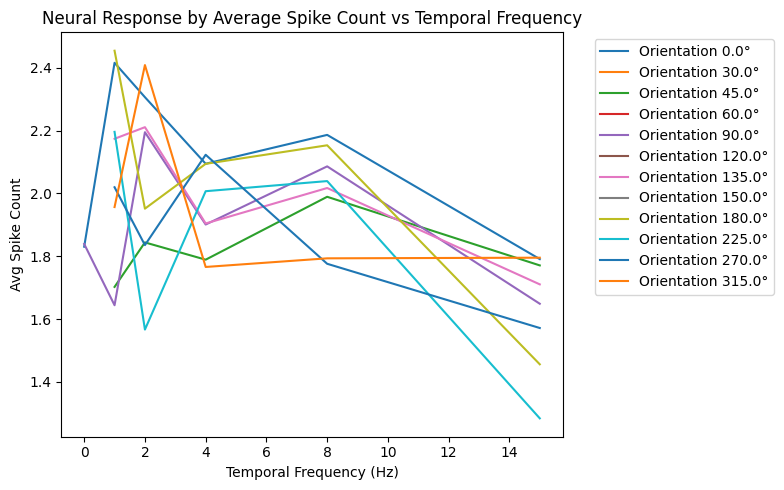

In [62]:
import matplotlib.pyplot as plt

# Clean up orientation values if necessary
orientations = sorted([o for o in combined_clean["orientation"].unique() if o != 'null'])

plt.figure(figsize=(8, 5))

for orient in orientations:
    # Mask for current orientation
    mask = (combined_clean["orientation"] == orient)
    subset = combined_clean[mask]

    # Temporal frequencies in this orientation
    freqs = sorted(subset["temporal_frequency"].unique())
    
    # Compute mean spike count (averaged across all neurons and trials)
    avg_spikes = []
    for f in freqs:
        trials = subset[subset["temporal_frequency"] == f]["spikes"]
        # Each "spikes" is an array → stack into 2D matrix
        spike_matrix = np.vstack(trials)
        avg_spikes.append(spike_matrix.mean())

    plt.plot(freqs, avg_spikes, label=f"Orientation {orient}°")

plt.xlabel("Temporal Frequency (Hz)")
plt.ylabel("Avg Spike Count")
plt.title("Neural Response by Average Spike Count vs Temporal Frequency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



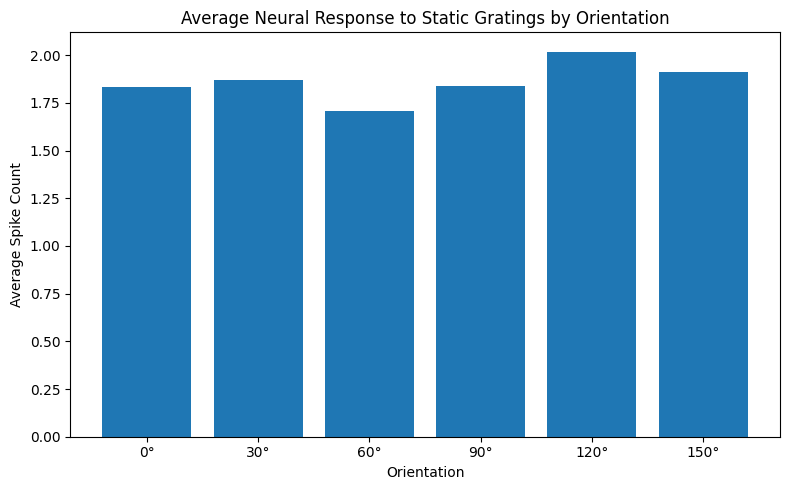

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter only static trials
static_data = combined_clean[combined_clean["temporal_frequency"] == 0.0]

# Step 2: Sort orientations numerically
orientations = sorted(static_data["orientation"].unique())

# Step 3: Compute average spike count for each orientation
avg_spikes = []
for orient in orientations:
    spikes = static_data[static_data["orientation"] == orient]["spikes"]
    spike_matrix = np.vstack(spikes)
    avg_spikes.append(spike_matrix.mean())

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.bar([f"{int(o)}°" for o in orientations], avg_spikes)
plt.xlabel("Orientation")
plt.ylabel("Average Spike Count")
plt.title("Average Neural Response to Static Gratings by Orientation")
plt.tight_layout()
plt.show()



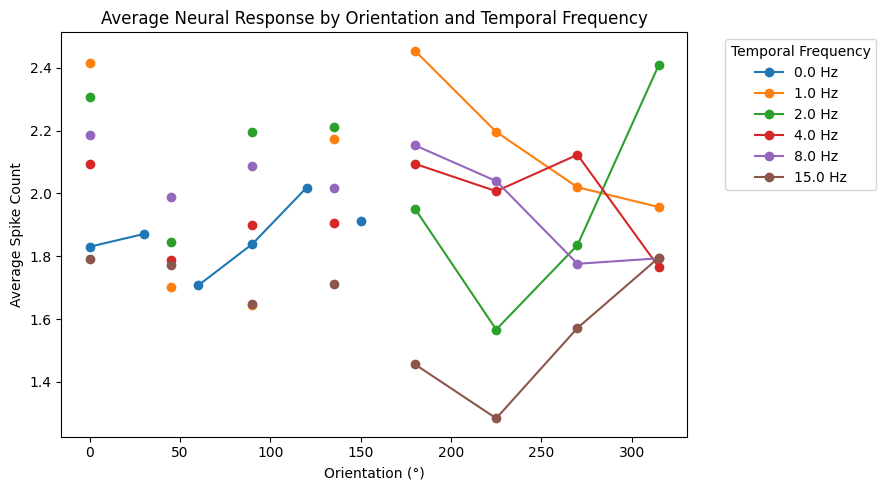

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get sorted unique values
orientations = sorted(combined_clean["orientation"].unique())
temporal_freqs = sorted(combined_clean["temporal_frequency"].unique())

# Step 2: Compute avg spike for each (orientation, freq) pair
plt.figure(figsize=(9, 5))

for freq in temporal_freqs:
    avg_spikes = []
    for orient in orientations:
        mask = (combined_clean["orientation"] == orient) & (combined_clean["temporal_frequency"] == freq)
        spikes = combined_clean[mask]["spikes"]
        if len(spikes) > 0:
            spike_matrix = np.vstack(spikes)
            avg_spikes.append(spike_matrix.mean())
        else:
            avg_spikes.append(np.nan)  # in case that combination doesn't exist

    plt.plot(orientations, avg_spikes, marker='o', label=f"{freq} Hz")

# Step 3: Format plot
plt.xlabel("Orientation (°)")
plt.ylabel("Average Spike Count")
plt.title("Average Neural Response by Orientation and Temporal Frequency")
plt.legend(title="Temporal Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1 Hz and 2 Hz: Higher and more variable responses across orientations.

Some orientations (e.g., around 0° and 180°) show peaks for multiple frequencies.

Suggests tuning to both speed and orientation: the neuron populations respond more selectively when the stimulus is moving.

In [76]:
# Assuming visam_units contains the unit_ids in the same order as the columns of spike_matrix
unit_ids = visam_units  # shape should match spike_matrix.shape[1]

# Create neuron_df with correct neuron IDs and their variances
neuron_variances = np.var(spike_matrix, axis=0)
neuron_df = pd.DataFrame({
    "neuron_id": unit_ids,
    "variance": neuron_variances
}).sort_values(by="variance", ascending=False)

# Select top N real neuron IDs
top_n = 10
top_neurons = neuron_df.head(top_n)["neuron_id"].values

# ✅ Convert real neuron IDs to positional indices
# This gives you the column indices corresponding to the selected neuron IDs
neuron_id_to_index = {neuron_id: idx for idx, neuron_id in enumerate(unit_ids)}
top_neuron_indices = [neuron_id_to_index[nid] for nid in top_neurons]

# Now index the spike_matrix safely
selected_spikes = spike_matrix[:, top_neuron_indices]

print("Selected spike matrix shape:", selected_spikes.shape)


Selected spike matrix shape: (15, 10)


In [77]:
print("spike_matrix_3 shape:", spike_matrix_3.shape)

spike_matrix_3 shape: (1759, 296)


In [78]:
neuron_df

,neuron_id,variance
244,951819593,133.493333
220,951819135,114.915556
23,951815269,59.040000
179,951810983,36.462222
181,951811026,29.582222
...,...,...
255,951820355,0.000000
184,951811065,0.000000
176,951810851,0.000000
245,951819652,0.000000


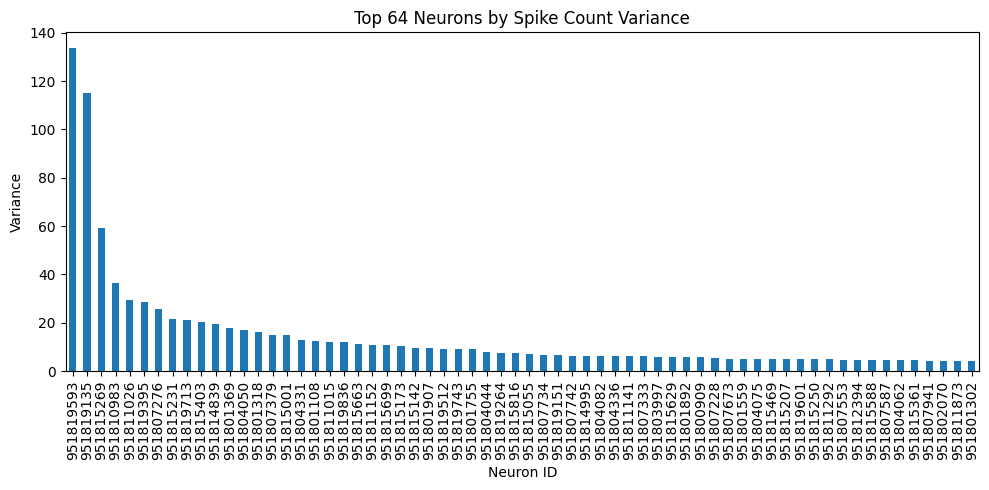

In [79]:
top_n = 64
neuron_df.head(top_n).plot(
    x="neuron_id",
    y="variance",
    kind="bar",
    legend=False,
    figsize=(10, 5),
    title=f"Top {top_n} Neurons by Spike Count Variance"
)
plt.ylabel("Variance")
plt.xlabel("Neuron ID")
plt.tight_layout()
plt.show()



#### 80th Percetile

In [80]:
threshold = np.percentile(neuron_df["variance"], 95)
top_neurons = neuron_df[neuron_df["variance"] > threshold]

In [81]:
print(len(top_neurons))
top_neurons

15


,neuron_id,variance
244,951819593,133.493333
220,951819135,114.915556
23,951815269,59.040000
179,951810983,36.462222
181,951811026,29.582222
234,951819395,28.515556
65,951807276,25.626667
26,951815231,21.528889
251,951819713,21.262222
36,951815403,20.248889


In [82]:
top_ids = top_neurons["neuron_id"].values

# Filter session_data.units by these neuron IDs
top_neuron_regions = session_data.units.loc[top_ids, "ecephys_structure_acronym"]

region_info = pd.DataFrame({
    "neuron_id": top_ids,
    "region": top_neuron_regions.values,
    "variance": top_neurons["variance"].values
})

region_info = region_info.sort_values(by="variance", ascending=False).reset_index(drop=True)
display(region_info)


,neuron_id,region,variance
0,951819593,VISal,133.493333
1,951819135,VISal,114.915556
2,951815269,VISam,59.040000
3,951810983,VISl,36.462222
4,951811026,VISl,29.582222
5,951819395,VISal,28.515556
6,951807276,VIS,25.626667
7,951815231,VISam,21.528889
8,951819713,VISal,21.262222
9,951815403,VISam,20.248889


### HEATMAP FOR TOP NEURONS

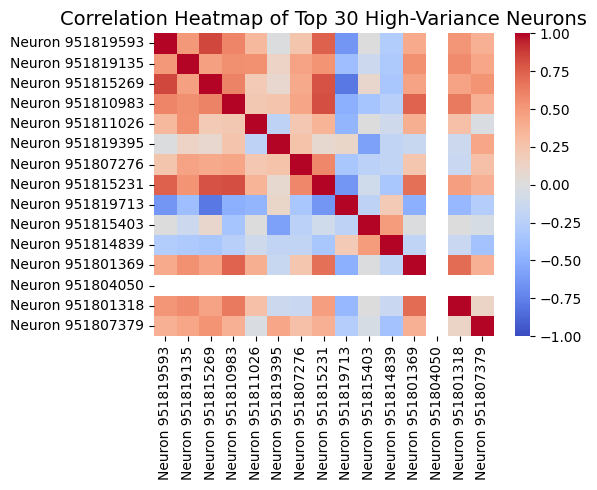

In [83]:
import seaborn as sns

id_to_index = {nid: i for i, nid in enumerate(neuron_df["neuron_id"].values)}

top_indices = [id_to_index[nid] for nid in top_neurons["neuron_id"].values]

top_spikes = spike_matrix[:, top_indices]

# Create DataFrame for correlation plot
df_corr = pd.DataFrame(top_spikes, columns=[f"Neuron {nid}" for nid in top_neurons["neuron_id"].values])

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Top 30 High-Variance Neurons", fontsize=14)
plt.tight_layout()
plt.show()


subgroups of neurons that are strongly correlated with each other (horizontal or vertical streaks of red).

These may belong to the same brain region or functional module (e.g., neurons encoding similar features like motion or orientation).

❄️ Blue or Mixed Blocks:
Neurons with opposing tuning or different encoding roles might be negatively correlated (e.g., one prefers high temporal freq, another low).

Alternatively, anti-correlated activity may emerge if neurons belong to different functional networks.

🧊 Sparse correlations:
If most values are near zero (whitish), it suggests that neurons are relatively independent or non-redundant in how they respond across trials – THEREFORE WE WONT BE NEEDING A PCA!

### CLUSTERING

 We apply K Means Clustering. 
 
 Each neuron is represented by its activity across different trials. After standardizing the data, we use PCA to visualize clusters.

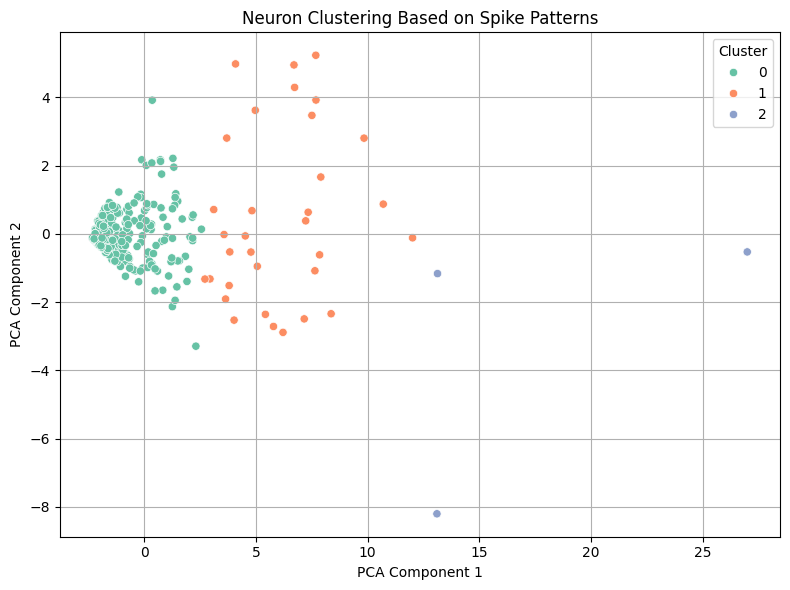

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Transpose spike_matrix so each row is one neuron’s spike pattern across trials
neuron_features = spike_matrix.T

# Standardize
scaler = StandardScaler()
neuron_features_scaled = scaler.fit_transform(neuron_features)

# Run k-means
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(neuron_features_scaled)

# Project to 2D for visualization
pca = PCA(n_components=2)
proj = pca.fit_transform(neuron_features_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette="Set2")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Neuron Clustering Based on Spike Patterns")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

What this means:
 
Cluster 0 (green): most neurons fall here — these are very similar in how they respond to stimuli.
 
Cluster 1 (orange): more spread out — these neurons respond differently than Cluster 0.
 
Cluster 2 (blue): only a few neurons — possibly outliers, or neurons with very unique response patterns.

#### 2. Cluster trials based on stimulus properties and spike responses

We’ll cluster stimulus presentations (i.e. trials) based on how neurons responded to each one.

Each trial will be represented by a vector of spike counts across neurons during that stimulus. Then we’ll use dimensionality reduction + clustering to group similar responses.

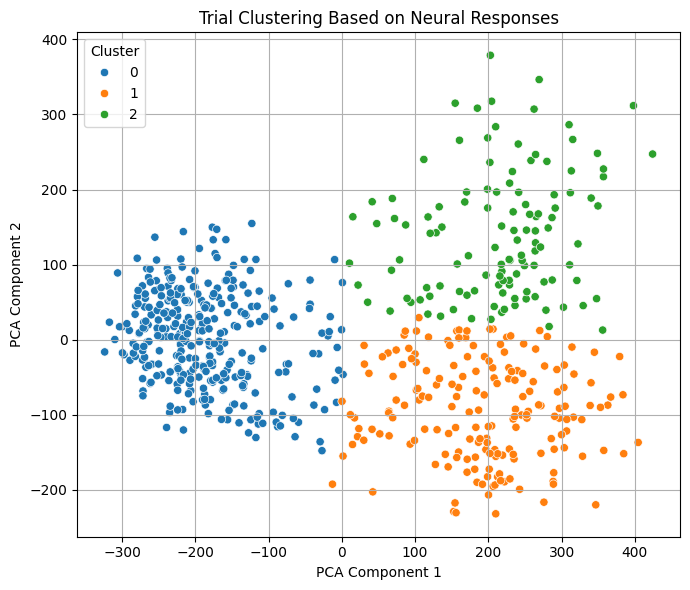

In [104]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use your filtered unit IDs
unit_ids = good_units.index.values
spike_times = session_data.spike_times  # dict: unit_id → spike times

# Get trials of drifting gratings
drifting = session_data.stimulus_presentations[
    session_data.stimulus_presentations["stimulus_name"] == "drifting_gratings"
]

# Count spikes for each trial and each neuron
trial_spike_counts = []

for _, row in drifting.iterrows():
    start, end = row["start_time"], row["stop_time"]
    trial_counts = []

    for unit_id in unit_ids:
        spikes = spike_times[unit_id]
        count = np.sum((spikes > start) & (spikes <= end))
        trial_counts.append(count)

    trial_spike_counts.append(trial_counts)

trial_spike_counts = np.array(trial_spike_counts)

# PCA and KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(trial_spike_counts)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot
plt.figure(figsize=(7, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10")
plt.title("Trial Clustering Based on Neural Responses")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

The clustering suggests that trials fall into three distinct response patterns across the neurons. This could indicate:

Neurons respond differently depending on certain properties of the stimulus (e.g., contrast, temporal frequency, orientation).

These clusters might correspond to different stimulus conditions, even though clustering didn’t use any labels.

Cluster 0 (blue): Trials where neural responses were strong/weak in a consistent way.

Cluster 1 (orange): Trials with a different spike pattern.

Cluster 2 (green): Yet another pattern of activation.

### ENCODING

#### for only one neuron

In [84]:
print(spike_matrix3.shape)

(1759, 296)



🎯 Encoding performance for Neuron 951815269:
R² score: 0.213
Mean Squared Error: 63.089


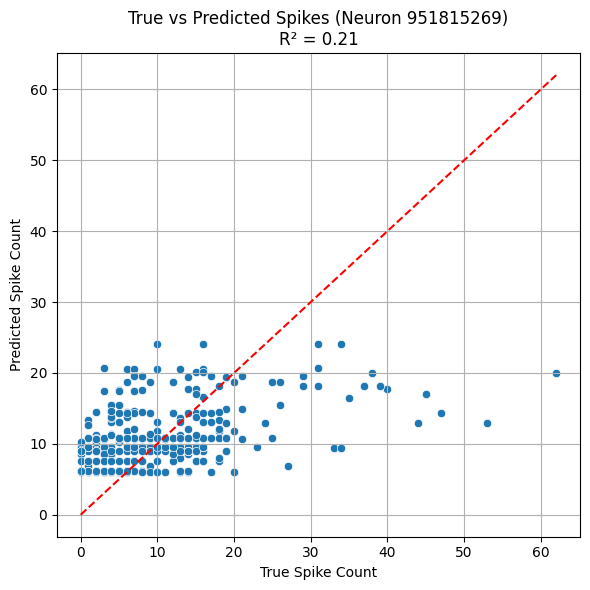

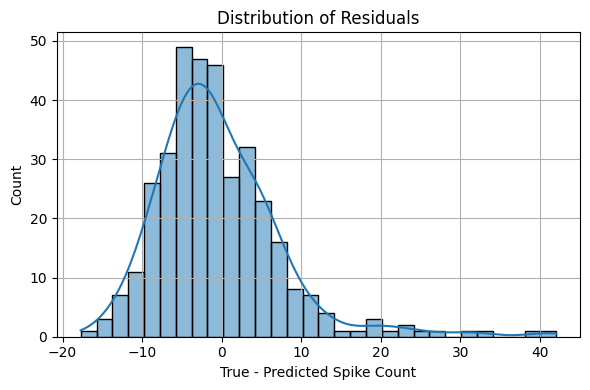

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# Define input X and target y
# -----------------------------
X = combined_clean[["orientation", "temporal_frequency"]].values

# Pick one neuron (e.g. 951815269)
neuron_id = 951815269
neuron_index = list(unit_ids).index(neuron_id)
y = spike_matrix3[:, neuron_index]

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Fit Random Forest Regressor
# -----------------------------
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# -----------------------------
# Evaluation Metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n🎯 Encoding performance for Neuron {neuron_id}:")
print(f"R² score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# -----------------------------
# Plot 1: True vs Predicted
# -----------------------------
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Spike Count")
plt.ylabel("Predicted Spike Count")
plt.title(f"True vs Predicted Spikes (Neuron {neuron_id})\nR² = {r2:.2f}")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2: Residual Plot
# -----------------------------
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("True - Predicted Spike Count")
plt.grid(True)
plt.tight_layout()
plt.show()


Center near 0:
If the model were perfect, all points would lie on the identity line (true = predicted), and residuals would be close to 0.
Here, the peak is near -5, which suggests that the model often underpredicts the spike count (prediction is lower than true).

Left-skewed:
The distribution is skewed to the left, meaning the model more often underestimates the spike count than overestimates it.

Spread of residuals:
There's a wide spread—some residuals go from -20 to +40, meaning the prediction error can be quite large on some trials.

Gaussian-like shape:
The distribution loosely resembles a normal distribution, which is okay, but the skew and width suggest some systematic bias or unmodeled variability.

In [87]:
def evaluate_neuron_encoding(neuron_id, combined_clean, spike_matrix, unit_ids):
    # Inputs (stimulus features)
    X = combined_clean[["orientation", "temporal_frequency"]].values

    # Find index of neuron in spike matrix
    neuron_index = list(unit_ids).index(neuron_id)
    y = spike_matrix3[:, neuron_index]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Plot results
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # True vs predicted
    axs[0].scatter(y_test, y_pred, alpha=0.6)
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[0].set_xlabel("True Spike Count")
    axs[0].set_ylabel("Predicted Spike Count")
    axs[0].set_title(f"Neuron {neuron_id}\nR² = {r2:.2f}")

    # Residuals
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, ax=axs[1], bins=30)
    axs[1].set_title("Residuals")
    axs[1].set_xlabel("True - Predicted Spike Count")

    plt.tight_layout()
    plt.show()

    return r2


Evaluating Neuron 951819593


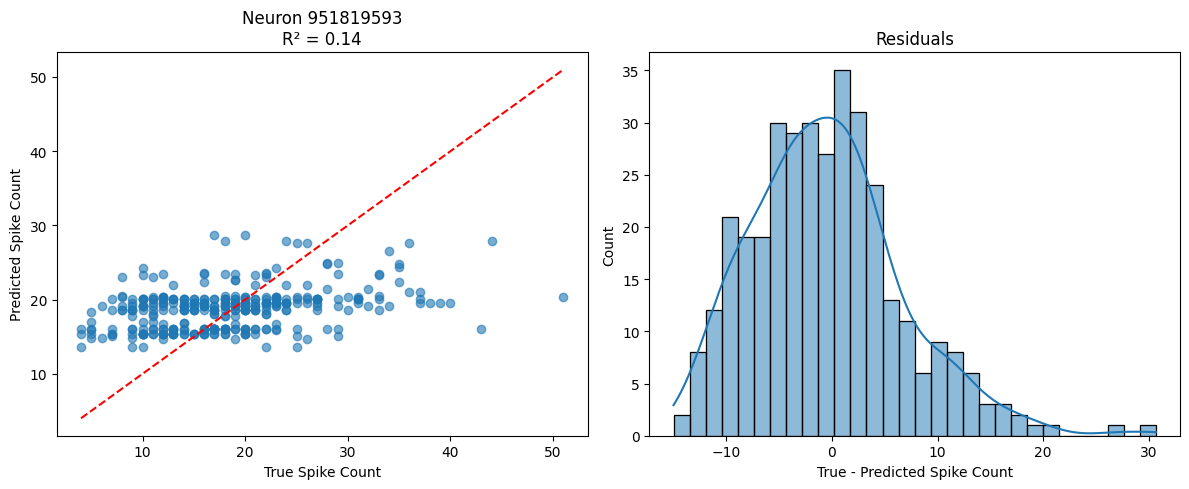


Evaluating Neuron 951819135


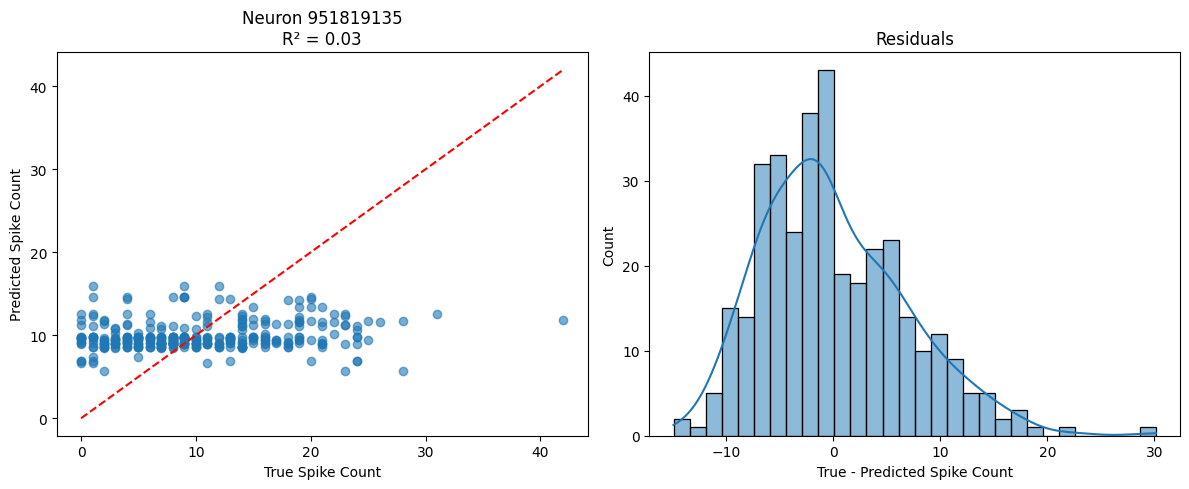


Evaluating Neuron 951815269


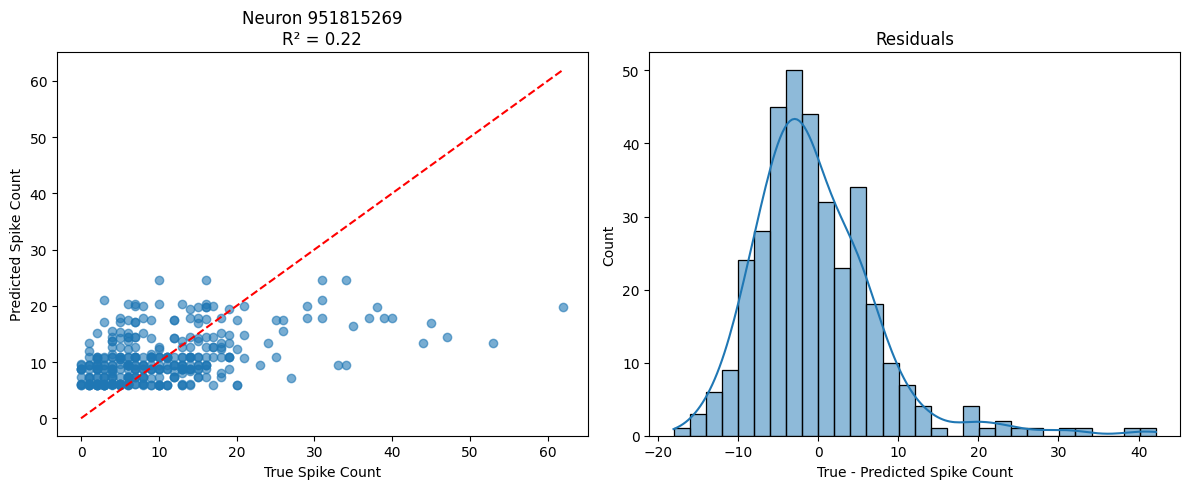


Evaluating Neuron 951810983


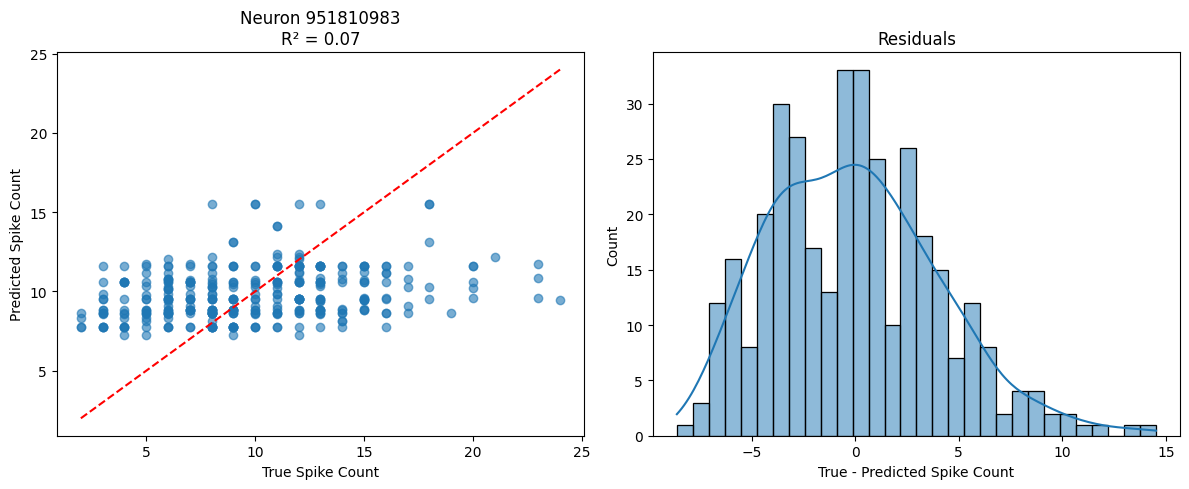


Evaluating Neuron 951811026


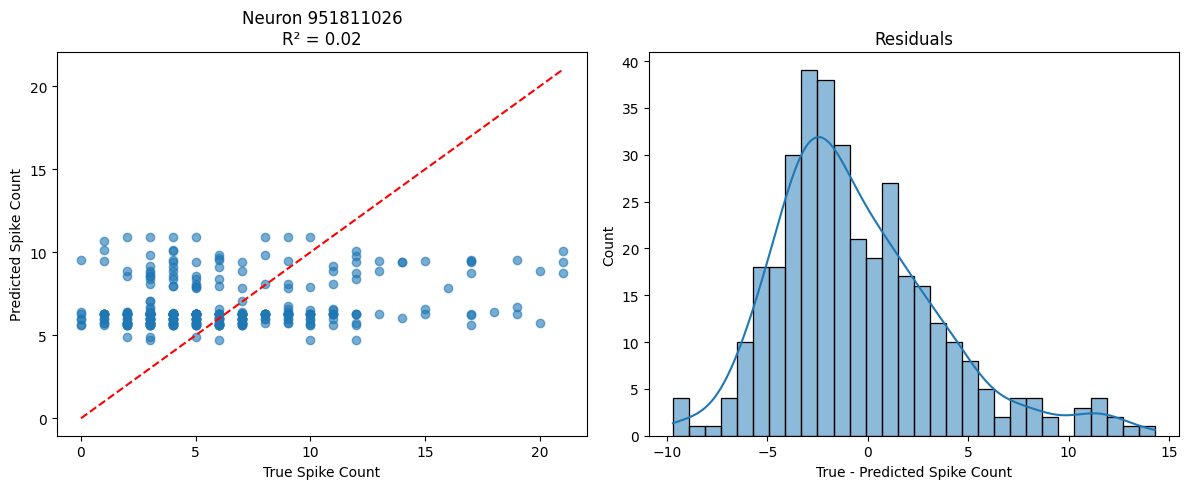


Evaluating Neuron 951819395


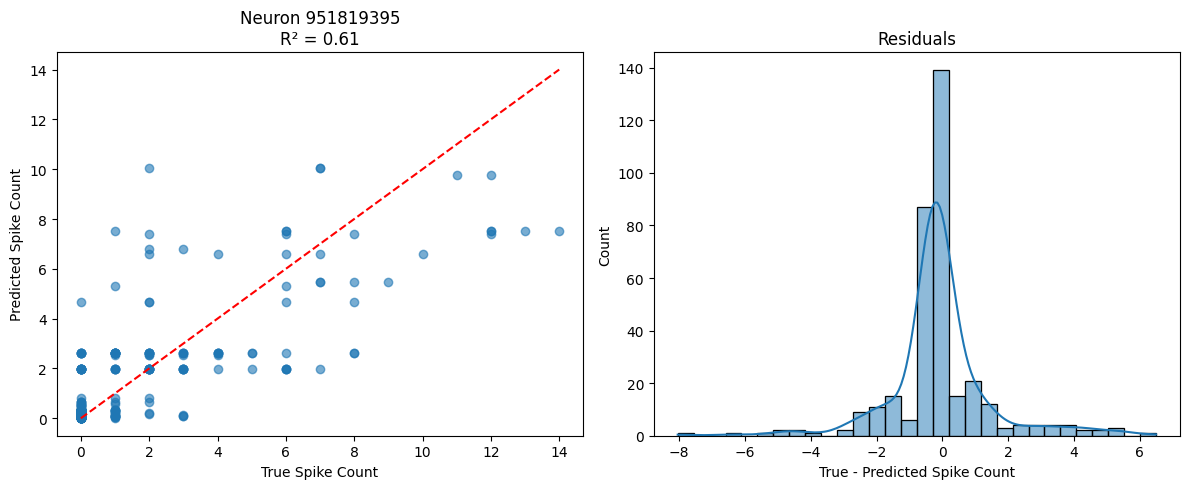


Evaluating Neuron 951807276


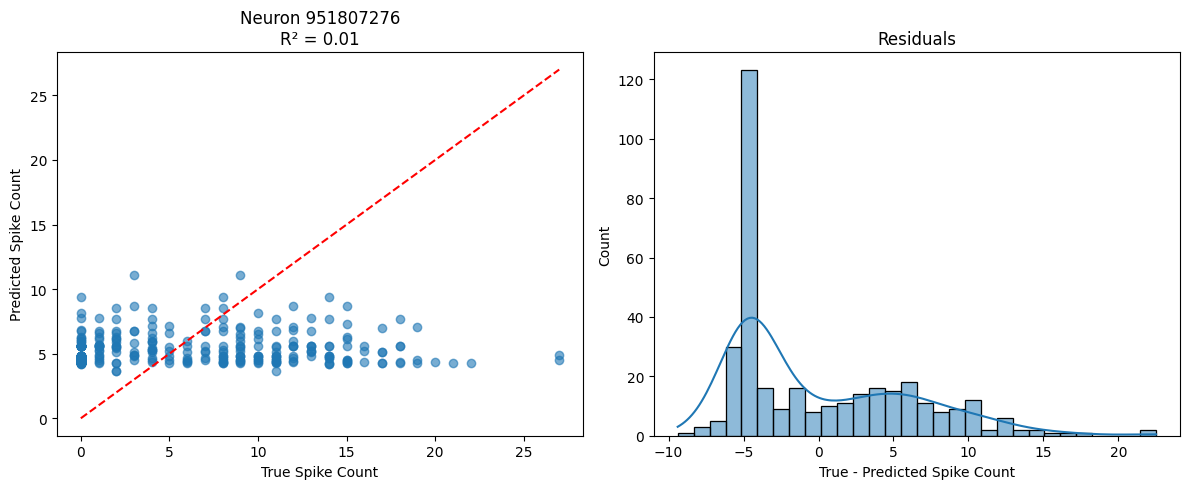


Evaluating Neuron 951815231


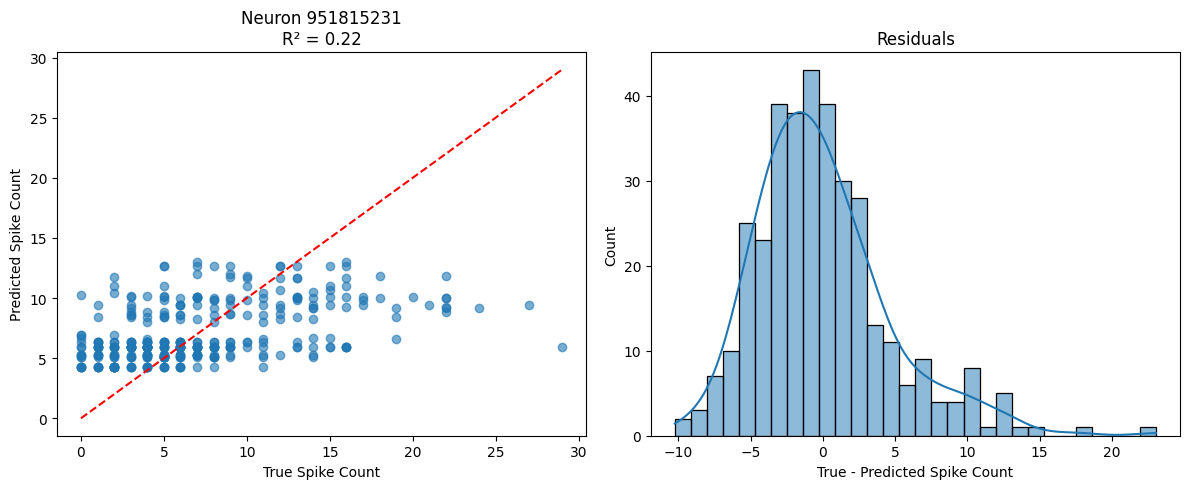


Evaluating Neuron 951819713


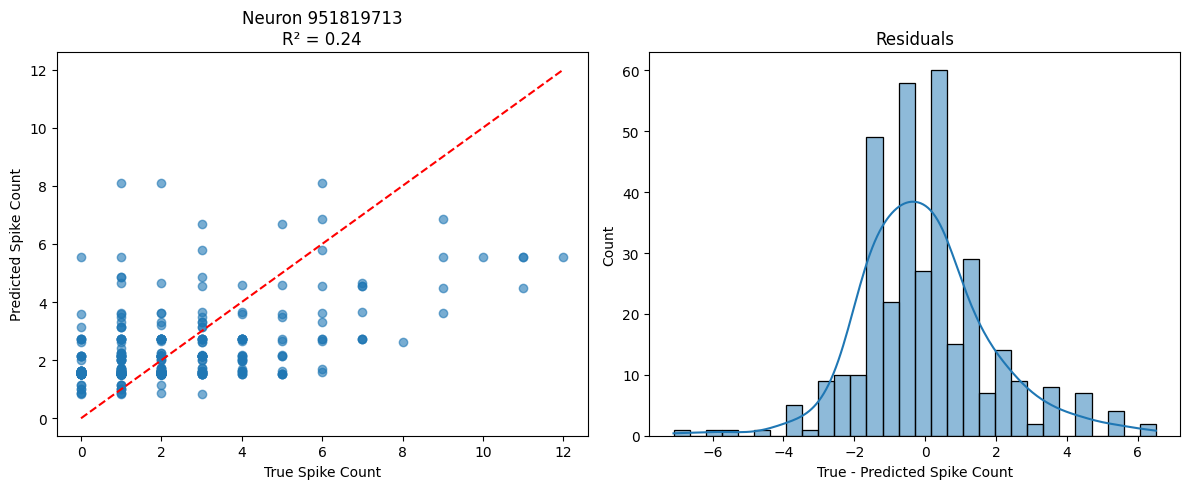


Evaluating Neuron 951815403


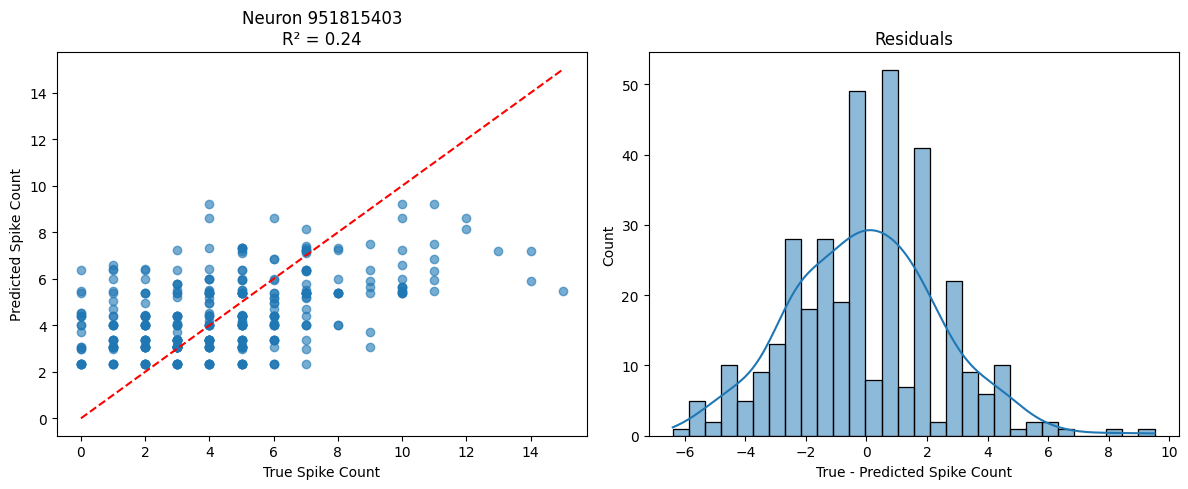


Evaluating Neuron 951814839


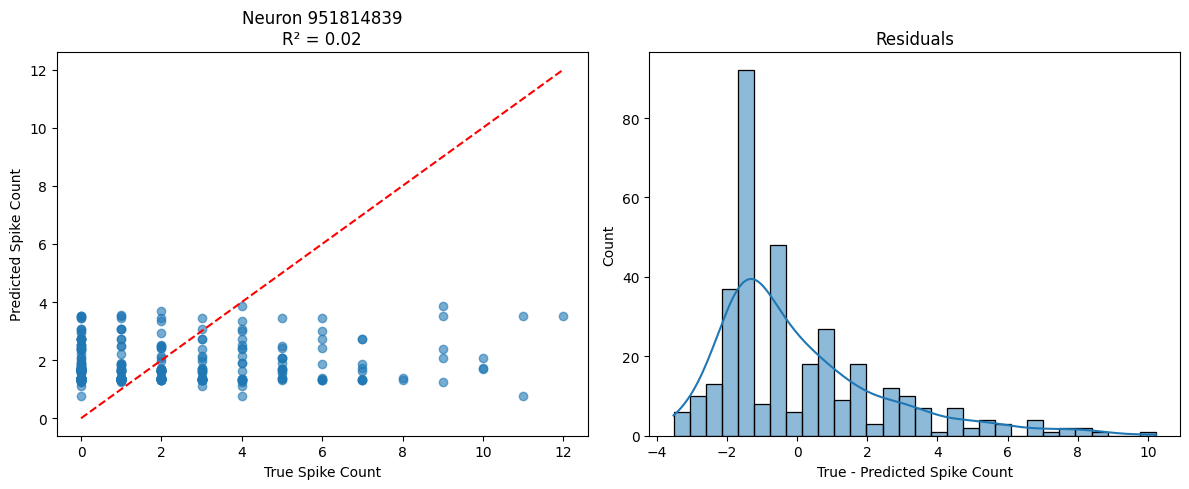


Evaluating Neuron 951801369


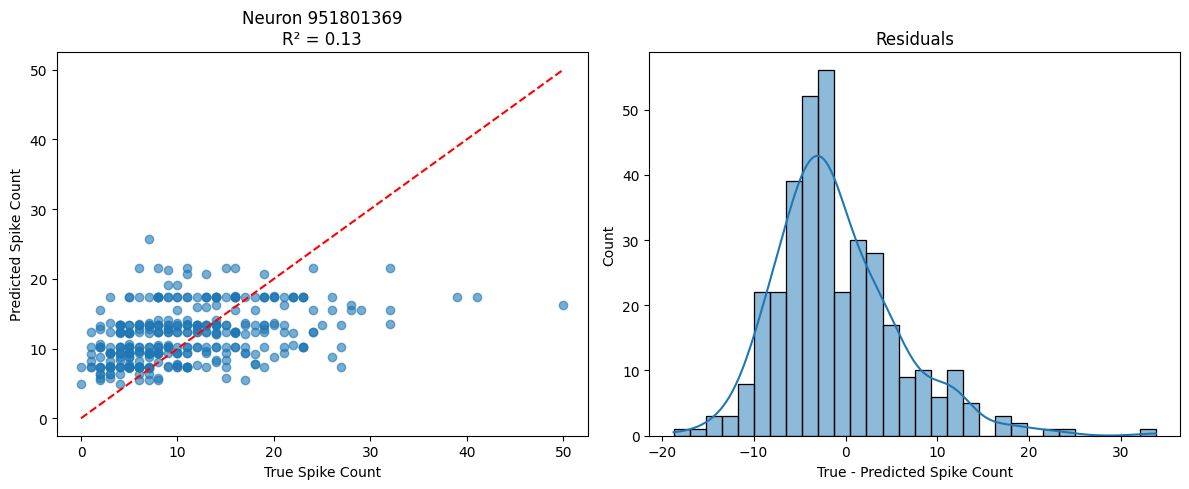


Evaluating Neuron 951804050


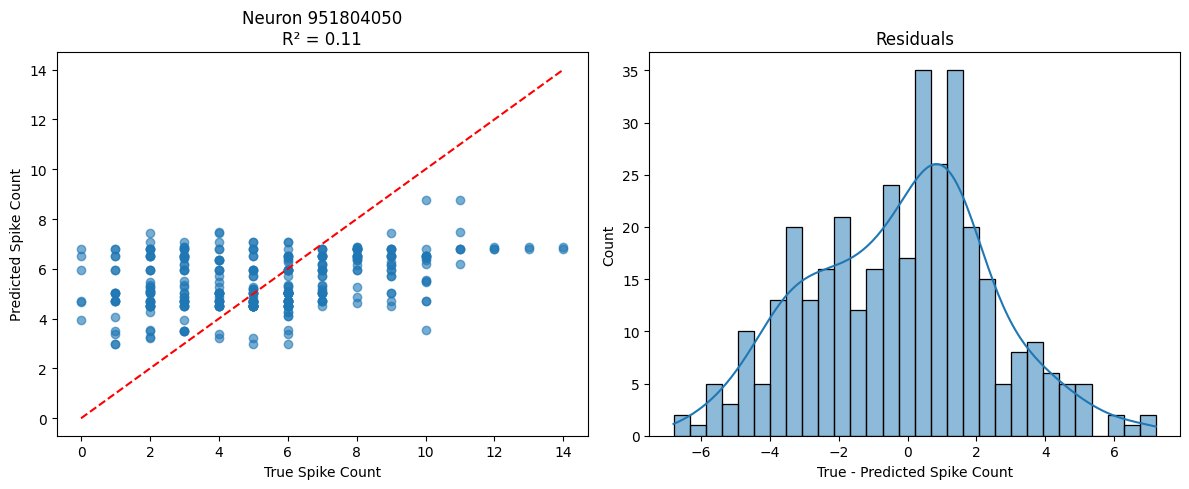


Evaluating Neuron 951801318


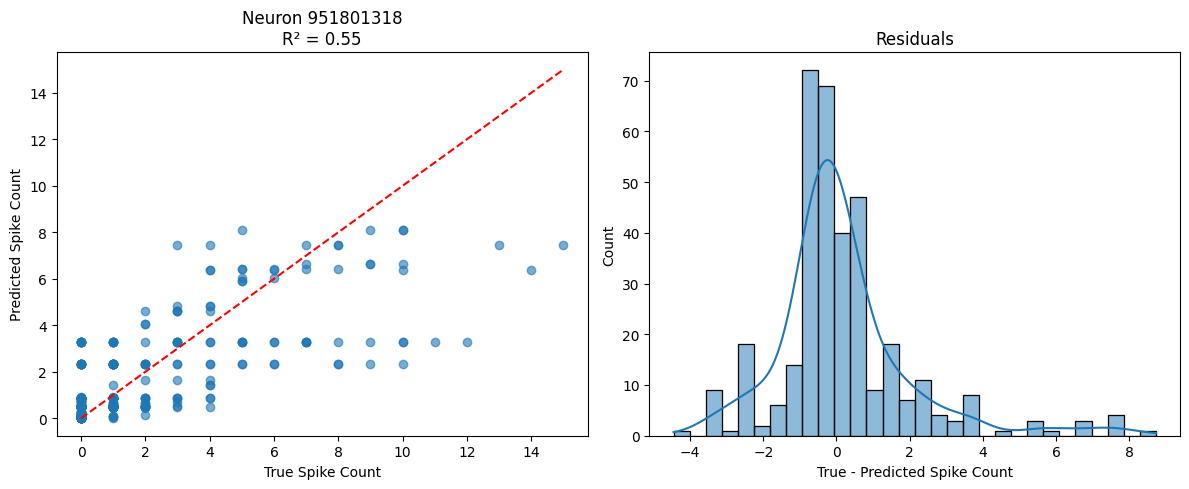


Evaluating Neuron 951807379


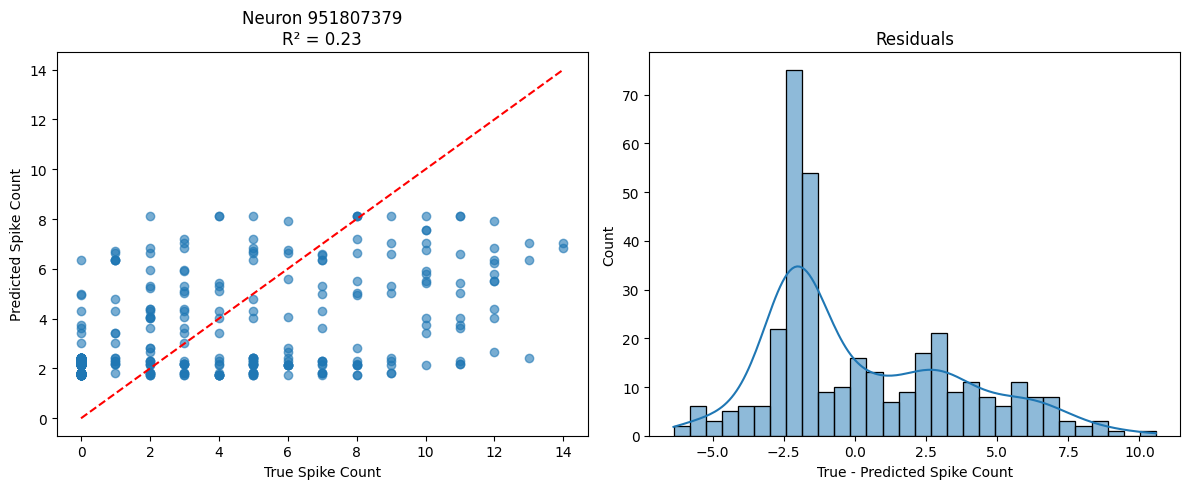

In [88]:
r2_results = {}

for neuron_id in top_neurons["neuron_id"]:
    print(f"\nEvaluating Neuron {neuron_id}")
    r2 = evaluate_neuron_encoding(neuron_id, combined_clean, spike_matrix3, unit_ids)
    r2_results[neuron_id] = r2


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

def run_regression_models_for_neurons(top_neuron_ids, combined_clean, spike_matrix, unit_ids):
    """
    Runs Random Forest and Linear Regression on spike prediction for each neuron in top_neuron_ids.
    Returns a DataFrame summarizing R² scores for each neuron.
    """
    results = []

    # Define stimulus features
    X = combined_clean[["orientation", "temporal_frequency"]].values

    for neuron_id in top_neuron_ids:
        if neuron_id not in unit_ids:
            print(f"Neuron {neuron_id} not found in unit_ids.")
            continue

        # Get index in spike matrix
        neuron_index = list(unit_ids).index(neuron_id)
        y = spike_matrix[:, neuron_index]

        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Model 1: Random Forest
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        r2_rf = r2_score(y_test, y_pred_rf)

        # Model 2: Linear Regression
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        r2_lr = r2_score(y_test, y_pred_lr)

        # Save results
        results.append({
            "neuron_id": neuron_id,
            "r2_random_forest": r2_rf,
            "r2_linear_regression": r2_lr
        })

    return pd.DataFrame(results)


In [90]:
regression_results = run_regression_models_for_neurons(
    top_neuron_ids=top_neurons["neuron_id"].values,
    combined_clean=combined_clean,
    spike_matrix=spike_matrix3,
    unit_ids=unit_ids
)

# Sort by Random Forest performance
regression_results_sorted = regression_results.sort_values(by="r2_random_forest", ascending=False)
display(regression_results_sorted)


,neuron_id,r2_random_forest,r2_linear_regression
5,951819395,0.607009,0.232671
13,951801318,0.548077,0.174372
8,951819713,0.236059,0.158184
9,951815403,0.236006,0.045239
14,951807379,0.227046,0.038687
7,951815231,0.224200,0.054436
2,951815269,0.218301,0.008697
0,951819593,0.138638,-0.012409
11,951801369,0.134985,-0.006861
12,951804050,0.114008,0.000783


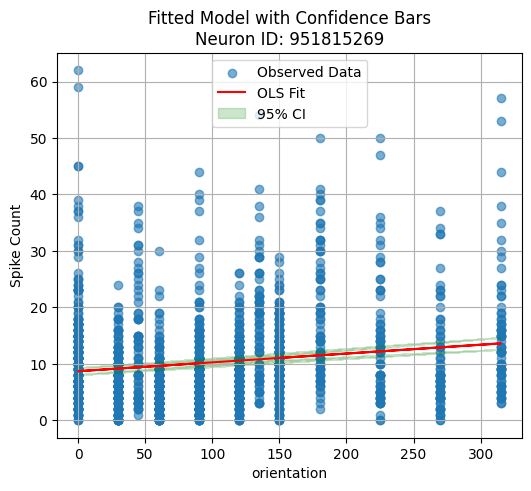

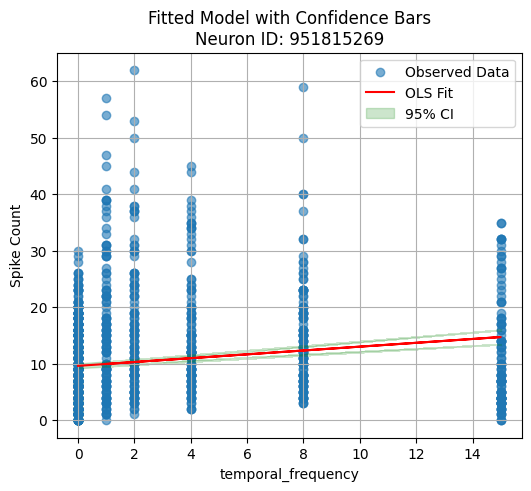

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_linear_fit_with_confidence(feature_name, combined_clean, spike_matrix, unit_ids, neuron_id):
    # Ensure the neuron is present
    if neuron_id not in unit_ids:
        print(f"Neuron ID {neuron_id} not found in unit_ids.")
        return

    # Get the index of the neuron in spike_matrix
    neuron_index = list(unit_ids).index(neuron_id)

    # Extract feature (X) and spike counts (y)
    X_feature = combined_clean[feature_name].values.astype(float).reshape(-1, 1)  # ensure it's float and 2D
    y = spike_matrix[:, neuron_index].astype(float)

    # Add constant term to X (intercept)
    X = sm.add_constant(X_feature)

    # Fit OLS regression
    model = sm.OLS(y, X).fit()

    # Get prediction with confidence intervals
    predictions = model.get_prediction(X)
    pred_summary = predictions.summary_frame(alpha=0.05)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(X_feature, y, alpha=0.6, label="Observed Data")
    plt.plot(X_feature, pred_summary["mean"], color='red', label="OLS Fit")
    plt.fill_between(X_feature.flatten(),
                     pred_summary["mean_ci_lower"],
                     pred_summary["mean_ci_upper"],
                     color='green', alpha=0.2, label="95% CI")
    plt.xlabel(feature_name)
    plt.ylabel("Spike Count")
    plt.title(f"Fitted Model with Confidence Bars\nNeuron ID: {neuron_id}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage example:
plot_linear_fit_with_confidence("orientation", combined_clean, spike_matrix3, unit_ids, neuron_id=951815269)
plot_linear_fit_with_confidence("temporal_frequency", combined_clean, spike_matrix3, unit_ids, neuron_id=951815269)


### QUADRATIC REGRESSION

In [101]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def quadratic_regression(top_neuron_ids, combined_clean, spike_matrix, unit_ids):
    results = []

    for neuron_id in top_neuron_ids:
        try:
            # Get the index of the neuron in spike_matrix
            neuron_index = list(unit_ids).index(neuron_id)
            y = spike_matrix[:, neuron_index]

            # Prepare input features
            X = combined_clean[["orientation", "temporal_frequency"]].astype(float).copy()
            X["orientation_squared"] = X["orientation"] ** 2
            X["temporal_frequency_squared"] = X["temporal_frequency"] ** 2

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Add constant for intercept
            X_train_const = sm.add_constant(X_train)
            X_test_const = sm.add_constant(X_test)

            # Fit quadratic regression
            model = sm.OLS(y_train, X_train_const).fit()
            y_pred = model.predict(X_test_const)

            # Metrics
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)

            results.append({
                "neuron_id": neuron_id,
                "r2_quadratic": round(r2, 3),
                "mse_quadratic": round(mse, 3)
            })

        except Exception as e:
            print(f" Error for neuron {neuron_id}: {e}")
            continue

    return pd.DataFrame(results)


In [102]:
quadratic_results = quadratic_regression(
    top_neurons["neuron_id"].values,
    combined_clean,
    spike_matrix3,
    unit_ids
)


quadratic_results_sorted = quadratic_results.sort_values(by="r2_quadratic", ascending=False)
display(quadratic_results_sorted)



,neuron_id,r2_quadratic,mse_quadratic
5,951819395,0.210,4.914
13,951801318,0.203,6.128
9,951815403,0.176,6.638
7,951815231,0.163,23.539
8,951819713,0.156,3.793
14,951807379,0.129,12.773
2,951815269,0.103,71.952
0,951819593,0.053,56.205
10,951814839,0.045,5.581
3,951810983,0.032,17.417
